In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [12]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [13]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [14]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

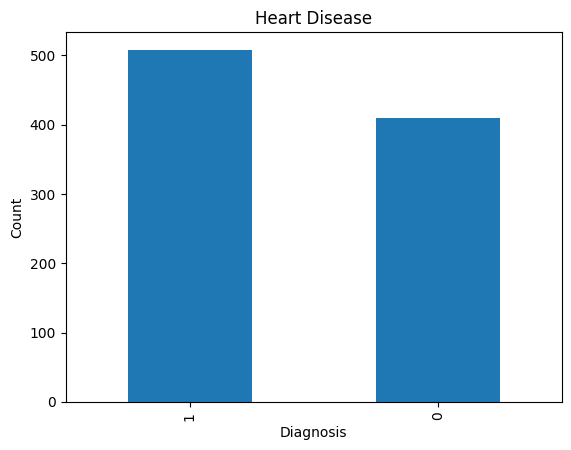

In [17]:
#Histogram for type of di

df['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Heart Disease')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


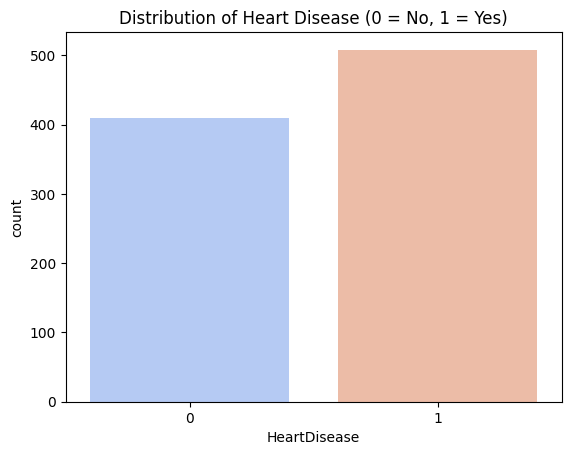

,proportion
HeartDisease,
1,55.337691
0,44.662309


In [20]:
#Q.What is the distribution of target variable (Heart Disease presence)?
# Count plot for target
sns.countplot(x='HeartDisease', data=df, palette='coolwarm', hue='HeartDisease', legend=False)
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.show()

# Value counts
df['HeartDisease'].value_counts(normalize=True) * 100

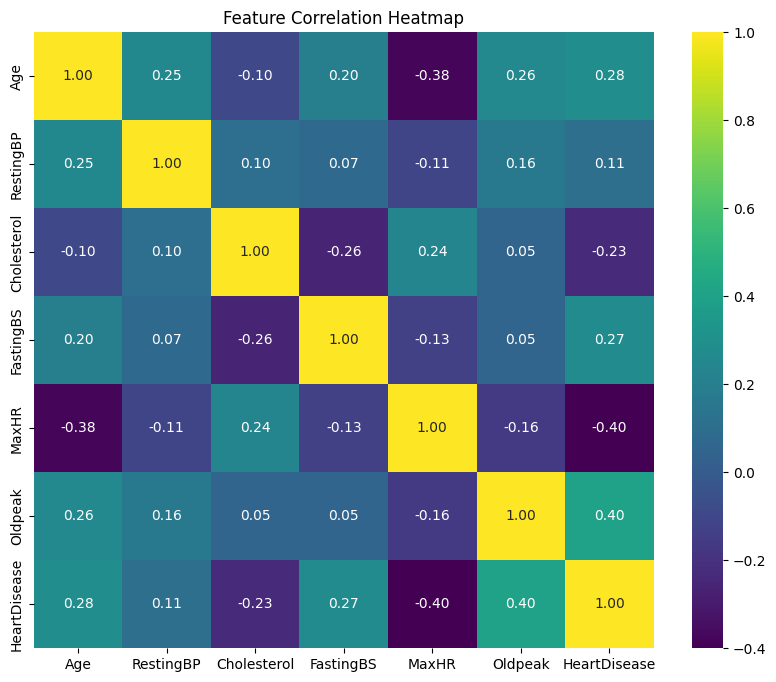

In [22]:
#Q.What are the correlations between numerical features?
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

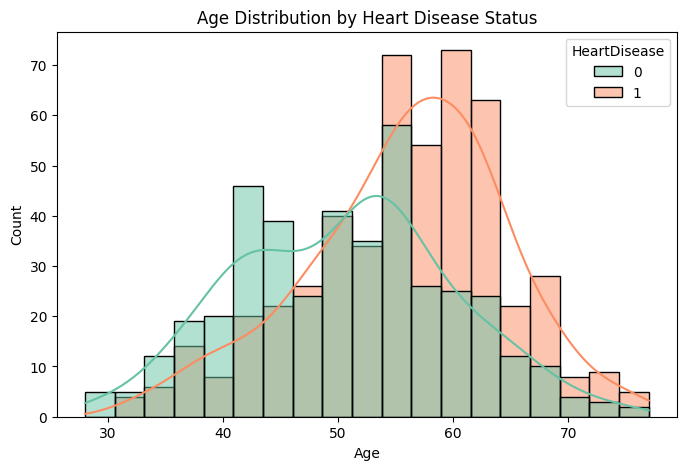

In [26]:
#Q.How does age relate to heart disease?
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='Set2')
plt.title("Age Distribution by Heart Disease Status")
plt.show()

/tmp/ipython-input-20311462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='husl')


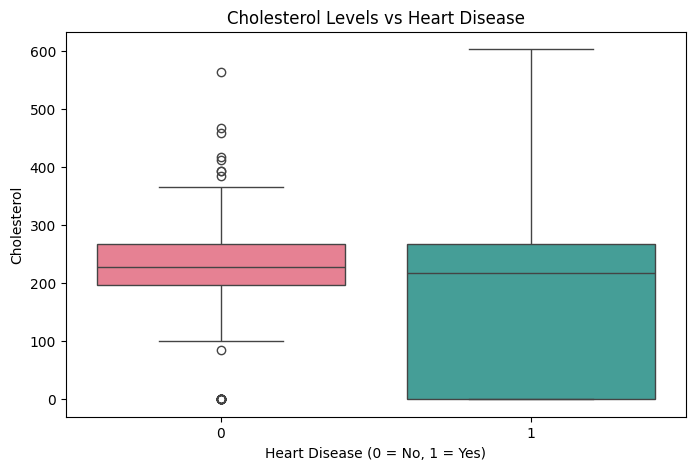

,Cholesterol
HeartDisease,
0,227.121951
1,175.940945


In [27]:
#Q.How does cholesterol level differ between patients with and without heart disease?
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, palette='husl')
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()

df.groupby('HeartDisease')['Cholesterol'].mean()

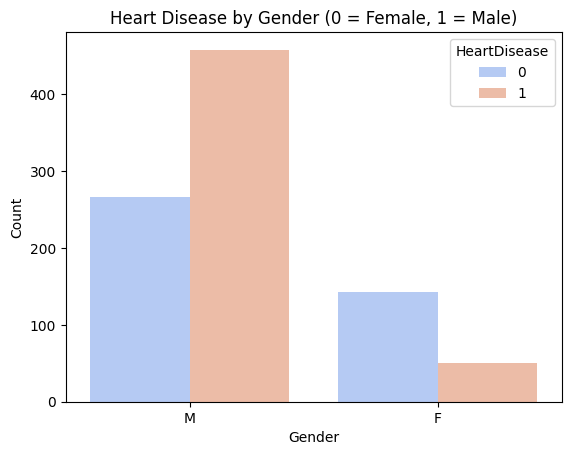

HeartDisease,0,1
Sex,,
F,74.093264,25.906736
M,36.827586,63.172414


In [35]:
#Q.Which gender has a higher chance of heart disease?
# Count of target values by gender
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='coolwarm')
plt.title("Heart Disease by Gender (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Percentage distribution
pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index') * 100

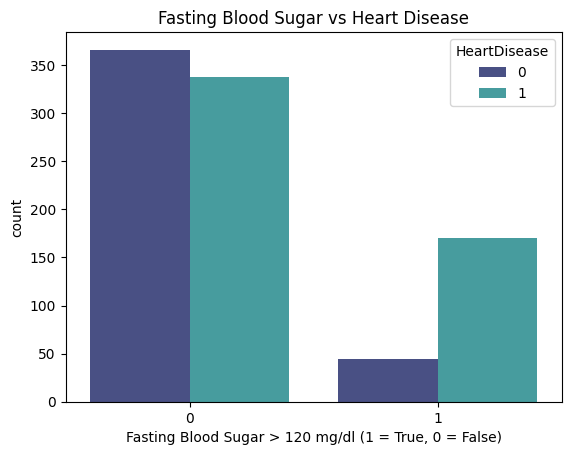

HeartDisease,0,1
FastingBS,,
0,51.988636,48.011364
1,20.560748,79.439252


In [37]:
#Q.Does fasting blood sugar (fbs) affect heart disease occurrence?
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='mako')
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)")
plt.show()

# Percentage table
pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize='index') * 100




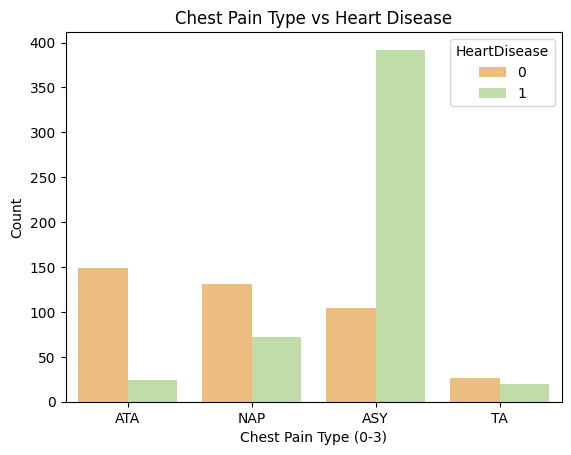

,HeartDisease
ChestPainType,
ASY,0.790323
ATA,0.138728
NAP,0.354680
TA,0.434783


In [39]:
#Q.How does chest pain type (cp) influence heart disease?
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Spectral')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.show()

# Mean target rate per cp type
df.groupby('ChestPainType')['HeartDisease'].mean()